<a href="https://colab.research.google.com/github/123nol/AI-projects/blob/main/HyperParameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')
print("Data loaded! First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget Distribution (Wine Quality):")
print(df['quality'].value_counts().sort_index())

# Step 5: Preprocess data
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data loaded! First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8     

In [ ]:
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

In [ ]:
param_grid = {'model__alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge_pipe, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

# Step 8: Train both models
# Train Ridge with best alpha
best_ridge.fit(X_train, y_train)

# Train Random Forest
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])


Ridge Regression Results:
RMSE: 0.627
R²: 0.399

Random Forest Results:
RMSE: 0.548
R²: 0.540


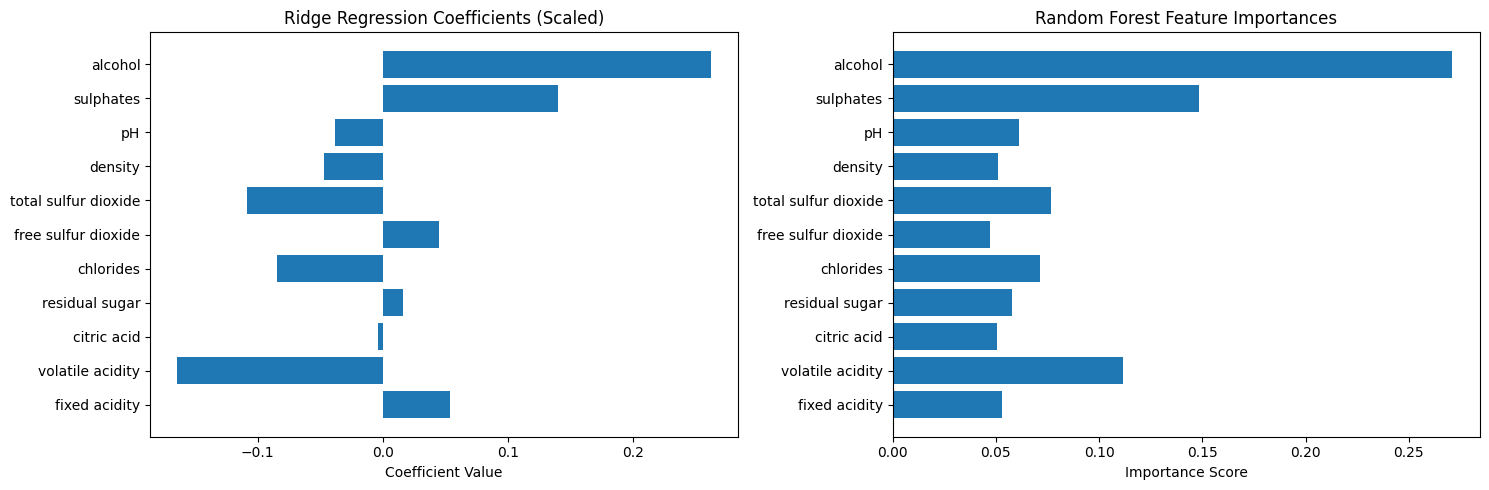

In [ ]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    return y_pred

_ = evaluate(best_ridge, "Ridge Regression")
_ = evaluate(rf_pipe, "Random Forest")

# Step 10: Visualize feature importance
# Ridge coefficients (scaled)
ridge_coefs = best_ridge.named_steps['model'].coef_
features = X.columns

# Random Forest feature importances
rf_importances = rf_pipe.named_steps['model'].feature_importances_

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.barh(features, ridge_coefs)
ax1.set_title("Ridge Regression Coefficients (Scaled)")
ax1.set_xlabel("Coefficient Value")

# Random Forest Importances
ax2.barh(features, rf_importances)
ax2.set_title("Random Forest Feature Importances")
ax2.set_xlabel("Importance Score")

plt.tight_layout()
plt.show()